# import libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

# read csv

In [12]:
sms = pd.read_csv('C:\\Users\\rachit\\Documents\\spam.csv', encoding='latin-1')
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms = sms.rename(columns = {'v1':'class','v2':'message'})
sms.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
sms.groupby('class').describe()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="4" halign="left">message</th>
    </tr>
    <tr>
      <th></th>
      <th>count</th>
      <th>unique</th>
      <th>top</th>
      <th>freq</th>
    </tr>
    <tr>
      <th>class</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>ham</th>
      <td>4825</td>
      <td>4516</td>
      <td>Sorry, I'll call later</td>
      <td>30</td>
    </tr>
    <tr>
      <th>spam</th>
      <td>747</td>
      <td>653</td>
      <td>Please call our customer service representativ...</td>
      <td>4</td>
    </tr>
  </tbody>
</table>
</div>

# add feature: message length

In [14]:
sms['length'] = sms['message'].apply(len)
sms.head()

,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# lengthier msg = likely a spam

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019AF279C978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000019AF351BBA8>], dtype=object)

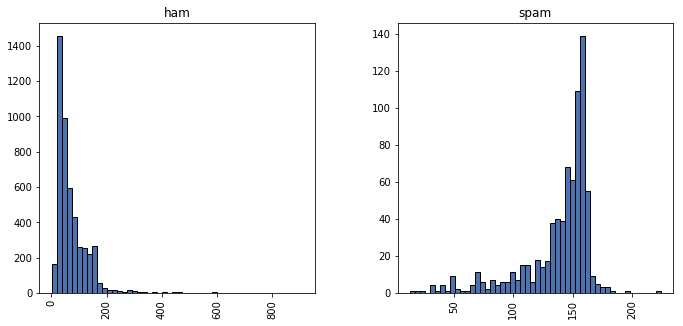

In [15]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-deep')
sms.hist(column='length', by='class', bins=50,figsize=(11,5))